In [1]:
%config Completer.use_jedi = False
import os

import numpy as np
import pandas as pd

import anndata
import scanpy as sc

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
from matplotlib import gridspec
import matplotlib as mpl
import seaborn as sns

from collections import defaultdict
import random
    
print('Load interaction') 
fn_int = '/home/yike/phd/dengue/data/interaction_source_file/interactions_DB.tsv'
interactions = pd.read_csv(fn_int, sep=',')[['gene_name_a', 'gene_name_b']]

print('Load high-quality cells only')
fn_h5ad = '/home/yike/phd/dengue/data/mergedata_20210519_hq_cts.h5ad'
adata = sc.read_h5ad(fn_h5ad)
print('normalize data to CPM (counts per million)')
sc.pp.normalize_total(adata, target_sum=1e6)
        
print('Restrict to interaction genes')
genes = np.unique(interactions)
genes = [i for i in genes if i in adata.var_names] # genes = genes - ['CCL3L3', 'CCL4L1', 'CCN6', 'KIR3DS1', 'YARS1']
adatag = adata[:, genes]

Load interaction
Load high-quality cells only
normalize data to CPM (counts per million)
Restrict to interaction genes


In [2]:
adata_children = adata[adata.obs['dataset'] == 'child']
adata_adults = adata[adata.obs['dataset'] == 'adult']
from adata_utilis import split_adata
print('split adata to [sick/condition, dataset]')
adata_dic = split_adata(adata)

split adata to [sick/condition, dataset]


In [3]:
data_cst = pd.read_csv('/home/yike/phd/dengue/data/tables/cell_subtype/data_pair.tsv', sep='\t', index_col=['cell_subtype_2', 'gene'])
data_ct = pd.read_csv('/home/yike/phd/dengue/data/tables/log2_fc.tsv', index_col=['cell_type', 'gene'])
data_ct.drop(['statistic', 'pvalue'], axis=1, inplace=True)
data_ct.columns = data_cst.columns
cst_idx = [(cst, gene) for cst in ['Macrophages', 
                                   'non_classical_monocytes',
                                   'IgA',
                                   'IgG1_proliferate',
                                   'Classical_monocytes',
                                   'IgG1_IgG2','IgG1',
                                   'IgM',] for gene in genes]
data_cst = data_cst.loc[cst_idx]

In [40]:
res.to_csv('/home/yike/phd/dengue/data/tables/cell_subtype/Mo_Pl_cst.tsv', sep='\t')

In [41]:
res

ga              csta  ga_med_pair  ga_fra_pair  ga_SD_fra  ga_D_fra  \
0    CXCR3               IgA     1.058357     0.781250   0.205567  0.162162   
1    CXCR3  IgG1_proliferate     1.106691     0.781250   0.568498  0.334520   
2    CXCR3         IgG1_IgG2     2.302328     0.714286   0.334400  0.327586   
3    CXCR3              IgG1     1.178789     0.785714   0.443459  0.360845   
4      MDK       Macrophages    -1.065906     0.285714   0.021164  0.031746   
..     ...               ...          ...          ...        ...       ...   
222  NAMPT               IgA     2.541867     0.968750   0.098501  0.046683   
223  NAMPT               IgA     2.541867     0.968750   0.098501  0.046683   
224  NAMPT         IgG1_IgG2     2.019319     0.857143   0.108800  0.066810   
225  NAMPT         IgG1_IgG2     2.019319     0.857143   0.108800  0.066810   
226  NAMPT         IgG1_IgG2     2.019319     0.857143   0.108800  0.066810   

        gb     cstb  gb_med_pair  gb_fra_pair  gb_SD_avg  gb_D_avg inter_type  
0    CCL19     cDCs    -5.474215     0.000000   0.000000  0.026549        mix  
1    CCL19     cDCs    -5.474215     0.000000   0.000000  0.026549        mix  
2    CCL19     cDCs    -5.474215     0.000000   0.000000  0.026549        mix  
3    CCL19     cDCs    -5.474215     0.000000   0.000000  0.026549        mix  
4     LRP1     cDCs    -1.656365     0.250000   0.128755  0.115044       down  
..     ...      ...          ...          ...        ...       ...        ...  
222   CCR5     cDCs     2.534717     0.708333   0.060086  0.026549         up  
223   CCR5     pDCs    -3.773626     0.000000   0.000000  0.025806        mix  
224   CCR5  T_cells     1.468848     0.750000   0.048619  0.029528         up  
225   CCR5     cDCs     2.534717     0.708333   0.060086  0.026549         up  
226   CCR5     pDCs    -3.773626     0.000000   0.000000  0.025806        mix  

[227 rows x 13 columns]

In [5]:
mushroom_genes = [{'LTBR': ['cDCs'], 'LTB': ['Plasmablasts']},
                  {'CXCR3': ['Plasmablasts'], 'CXCL10': ['Monocytes']},
                  {'CCR2': ['Plasmablasts'], 'CCL2': ['Monocytes']},
                  {'CCR2': ['Plasmablasts'], 'CCL8': ['Monocytes']},
                  {'CCR5': ['T_cells'], 'CCL4': ['B_cells']},
                  {'CCR5': ['T_cells'], 'CCL8': ['Monocytes']},
                  {'DPP4': ['pDCs'], 'CXCL10': ['Monocytes']},
                  {'SLC1A5': ['T_cells'], 'LGALS9': ['Plasmablasts']},
                  {'CCL4L2': 'Monocytes', 'FFAR2': ['Monocytes']},
                  {'CCL4L2': 'T_cells', 'FFAR2': ['Monocytes']},
                  {'BAG6': ['cDCs'], 'NCR3': ['Plasmablasts']},
                  {'CXCL8': ['Monocytes'], 'CXCR2': ['Monocytes']},
                  {'HAVCR2': ['T_cells'], 'LGALS9': ['Plasmablasts']},
                  {'ITGAX': ['B_cells', 'NK_cells'], 'FCER2': ['Plasmablasts']},
                  {'ITGB2': ['cDCs'], 'FCER2': ['Plasmablasts']},
                  {'ITGAX': ['B_cells', 'NK_cells'], 'ICAM1': ['Plasmablasts']},
                  {'ITGB2': ['cDCs'], 'ICAM1': ['Plasmablasts']},                  
                  {'ENTPD1': ['NK_cells'], 'ADORA2A': ['Plasmablasts']},
                  {'IL6': ['Monocytes'], 'IL6ST': ['Plasmablasts']},
                  {'CCL4L2': ['Monocytes'], 'VSIR': ['pDCs']},
                  {'KLRF1': ['Monocytes'], 'CLEC2B': ['Plasmablasts']},
                  {'CXCR2': ['Monocytes'], 'PPBP': ['Plasmablasts']},
                  {'CLEC2B': ['Plasmablasts'], 'KLRF1': ['Plasmablasts']}]
# Mo = ['Macrophages', 'non_classical_monocytes', 'Classical_monocytes'], 
# Pl = ['IgG1', 'IgG1_proliferate', 'IgG1_IgG2', 'IgM','IgA', ]

In [9]:
inter_genes = [{'LTBR': ['cDCs'], 'LTB': ['IgG1', 'IgG1_proliferate', 'IgG1_IgG2', 'IgM','IgA']},
            {'CXCR3': ['IgG1', 'IgG1_proliferate', 'IgG1_IgG2', 'IgM','IgA'], 'CXCL10': ['Macrophages', 'non_classical_monocytes', 'Classical_monocytes']},
            {'CCR2': ['IgG1', 'IgG1_proliferate', 'IgG1_IgG2', 'IgM','IgA'], 'CCL2': ['Macrophages', 'non_classical_monocytes', 'Classical_monocytes']},
            {'CCR2': ['IgG1', 'IgG1_proliferate', 'IgG1_IgG2', 'IgM','IgA'], 'CCL8': ['Macrophages', 'non_classical_monocytes', 'Classical_monocytes']},
            {'CCR5': ['T_cells'], 'CCL8': ['Macrophages', 'non_classical_monocytes', 'Classical_monocytes']},
            {'DPP4': ['pDCs'], 'CXCL10': ['Macrophages', 'non_classical_monocytes', 'Classical_monocytes']},
            {'SLC1A5': ['T_cells'], 'LGALS9': ['IgG1', 'IgG1_proliferate', 'IgG1_IgG2', 'IgM','IgA']},
            {'CCL4L2': ['Macrophages', 'non_classical_monocytes', 'Classical_monocytes'], 'FFAR2': ['Macrophages', 'non_classical_monocytes', 'Classical_monocytes']},
            {'CCL4L2': ['T_cells'], 'FFAR2': ['Macrophages', 'non_classical_monocytes', 'Classical_monocytes']},
            {'BAG6': ['cDCs'], 'NCR3': ['IgG1', 'IgG1_proliferate', 'IgG1_IgG2', 'IgM','IgA']},
            {'CXCL8': ['Macrophages', 'non_classical_monocytes', 'Classical_monocytes'], 'CXCR2': ['Macrophages', 'non_classical_monocytes', 'Classical_monocytes']},
            {'HAVCR2': ['T_cells'], 'LGALS9': ['IgG1', 'IgG1_proliferate', 'IgG1_IgG2', 'IgM','IgA']},
            {'ITGAX': ['B_cells', 'NK_cells'], 'FCER2': ['IgG1', 'IgG1_proliferate', 'IgG1_IgG2', 'IgM','IgA']},
            {'ITGB2': ['cDCs'], 'FCER2': ['IgG1', 'IgG1_proliferate', 'IgG1_IgG2', 'IgM','IgA']},
            {'ITGAX': ['B_cells', 'NK_cells'], 'ICAM1': ['IgG1', 'IgG1_proliferate', 'IgG1_IgG2', 'IgM','IgA']},
            {'ITGB2': ['cDCs'], 'ICAM1': ['IgG1', 'IgG1_proliferate', 'IgG1_IgG2', 'IgM','IgA']},
            {'ENTPD1': ['NK_cells'], 'ADORA2A': ['IgG1', 'IgG1_proliferate', 'IgG1_IgG2', 'IgM','IgA']},
            {'IL6': ['Macrophages', 'non_classical_monocytes', 'Classical_monocytes'], 'IL6ST': ['IgG1', 'IgG1_proliferate', 'IgG1_IgG2', 'IgM','IgA']},
            {'CCL4L2': ['Macrophages', 'non_classical_monocytes', 'Classical_monocytes'], 'VSIR': ['pDCs']},
            {'KLRF1': ['Macrophages', 'non_classical_monocytes', 'Classical_monocytes'], 'CLEC2B': ['IgG1', 'IgG1_proliferate', 'IgG1_IgG2', 'IgM','IgA']},
            {'CXCR2': ['Macrophages', 'non_classical_monocytes', 'Classical_monocytes'], 'PPBP': ['IgG1', 'IgG1_proliferate', 'IgG1_IgG2', 'IgM','IgA']},
            {'CLEC2B': ['IgG1', 'IgG1_proliferate', 'IgG1_IgG2', 'IgM','IgA'], 'KLRF1': ['IgG1', 'IgG1_proliferate', 'IgG1_IgG2', 'IgM','IgA']}]

In [10]:
def s_mushrooms(genes):
    '''
    genes = [{'ITGAX': ['B_cells', 'NK_cells'],
          'ITGB2': ['cDCs'],
          'ICAM1': ['Plasmablasts']},
         {'CCL4L2': ['Monocytes'], 'VSIR': ['pDCs']}]
    '''
    from matplotlib.patches import Wedge
    import matplotlib.pyplot as plt
    import matplotlib as mpl
    import math
    import numpy as np
    import pandas as pd
    import itertools

    conditions = ['S_dengue', 'dengue']
    cmap = plt.cm.get_cmap('viridis')
    vmin, vmax = -1, 3
    threshold = 0.01
    frac_cst = pd.read_csv('/home/yike/phd/dengue/data/tables/cell_subtype/fra.tsv', 
                      sep='\t', index_col=['cell_subtype_2', 'condition', 'gene'], squeeze=True)
    avg_cst = pd.read_csv('/home/yike/phd/dengue/data/tables/cell_subtype/avg.tsv', sep='\t',
                      index_col=['cell_subtype_2', 'condition', 'gene'], squeeze=True)
    
    frac_ct = pd.read_csv('/home/yike/phd/dengue/data/excels/log2_fc/S_dengue_vs_dengue/20210625_figure_4_code/fra.tsv', 
                          index_col=['cell_type', 'condition', 'gene'], squeeze=True)
    avg_ct = pd.read_csv('/home/yike/phd/dengue/data/excels/log2_fc/S_dengue_vs_dengue/20210625_figure_4_code/exp.tsv', 
                         index_col=['cell_type', 'condition', 'gene'], squeeze=True)

    yl = sum([len(list(itertools.chain.from_iterable(genesi.values()))) for genesi in genes])
    fig = plt.figure(figsize=((1 + 0.8 * 2) * 0.6, (1 + yl)* 0.6), dpi=300)

    grid = plt.GridSpec(yl , 2, wspace=0.1, hspace=0.1)
    
    cell_types = ['B_cells', 'T_cells', 'NK_cells', 'cDCs', 'pDCs']
    cell_subtypes = ['Macrophages', 
            'non_classical_monocytes',
            'IgA',
            'IgG1_proliferate',
            'Classical_monocytes',
            'IgG1_IgG2',
            'IgG1',
            'IgM',]

    axs = []
    for i in range(len(genes)):
         axs.append(plt.subplot(grid[sum(len(list(itertools.chain.from_iterable(genesi.values()))) for genesi in genes[: i]): sum(len(list(itertools.chain.from_iterable(genesi.values()))) for genesi in genes[: i+1]), 0: 1]))
    size_bar = plt.subplot(grid[0: 5, 1: 2])

    datap = []
    for genesi, ax in zip(genes, axs):
        cts = list(genesi.values())
        gs = list(genesi.keys())
        yticklabels = []
        for i, (csts, gene) in enumerate(zip(cts, gs)):
            avgs = []
            for cst in csts:
                yticklabels.append(gene + ' in\n' + cst.replace('_', ' '))
                for k, cond in enumerate(conditions):
                    if cst in cell_types:
                        fr = frac_ct.loc[(cst, cond, gene)]
                        av = np.log10(avg_ct.loc[(cst, cond, gene)] + 0.1)
                    elif cst in cell_subtypes:
                        fr = frac_cst.loc[(cst, cond, gene)]
                        av = np.log10(avg_cst.loc[(cst, cond, gene)] + 0.1)
                    avgs.append(av)

                    r = 0.5 * fr**0.3
                    color = cmap((min(vmax, av) - vmin) / (vmax - vmin))
                    theta0, theta1 = 180 * (k > 0), 180 + 180 * (k > 0)
                    datap.append({
                        'r': r,
                        'facecolor': color,
                        'center': (0, len(yticklabels)-1),
                        'theta': (theta0, theta1),
                        'ax': ax,
                    })
                if avgs[0] - avgs[1] > threshold:
                    datap[-2]['edgecolor'] = 'red'
                    datap[-1]['edgecolor'] = 'none'
                elif avgs[0] - avgs[1] < -threshold:
                    datap[-1]['edgecolor'] = 'red'
                    datap[-2]['edgecolor'] = 'none'
                else:
                    datap[-1]['edgecolor'] = 'none'
                    datap[-2]['edgecolor'] = 'none'   


        ax.set_yticks(np.arange(len(list(itertools.chain.from_iterable(genesi.values())))))
        ax.set_yticklabels(yticklabels)
        ax.set_ylim(-0.6, len(list(itertools.chain.from_iterable(genesi.values()))) - 0.4)        
        ax.set_xticks([])
        ax.set_xlim(-0.6, 1 - 0.4)

    for datum in datap:
        ax = datum['ax']
        r = datum['r']
        color = datum['facecolor']
        center = datum['center']
        theta0, theta1 = datum['theta']
        ec = datum['edgecolor']

        h = Wedge(
            center, r, theta0, theta1, facecolor=color, edgecolor=ec
        )
        ax.add_artist(h)
        ax.set_aspect(1)

    size_bar.set_ylim(-0.6, 5 - 0.4)        
    c = [(0.5, i) for i in range(5)]
    radius = [0.5 * fr**0.3 for fr in [0.05, 0.1, 0.2, 0.4, 0.8]]
    for c, r in zip(c, radius):
        e = Wedge(c, r, 0, 180, facecolor='gray',)
        size_bar.add_artist(e)
    size_bar.set_aspect(1)
    size_bar.set_yticks([])
    size_bar.set_yticks(range(5))
    size_bar.set_yticklabels(['5', '10', '20', '40', '80'])
    size_bar.yaxis.tick_right()
    size_bar.yaxis.set_label_position('right')
    size_bar.set_ylabel('Gene exp frac')
    size_bar.set_xticks([])
    size_bar.spines['bottom'].set_visible(False)
    size_bar.spines['top'].set_visible(False)
    size_bar.spines['right'].set_visible(False)
    size_bar.spines['left'].set_visible(False)

    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax) 
    cmap = plt.cm.get_cmap('viridis')
    position = fig.add_axes([0.7, 0.2, 0.05, 2/yl])
    cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), cax=position, ax=axs[-1], label='Gene exp \n(log10[cpm+0.1])')

    fig.tight_layout()
    return {'fig': fig, 'ax': axs}

<ipython-input-10-698399067179>:133: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


{'fig': <Figure size 468x25740 with 24 Axes>,
 'ax': [<AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>]}

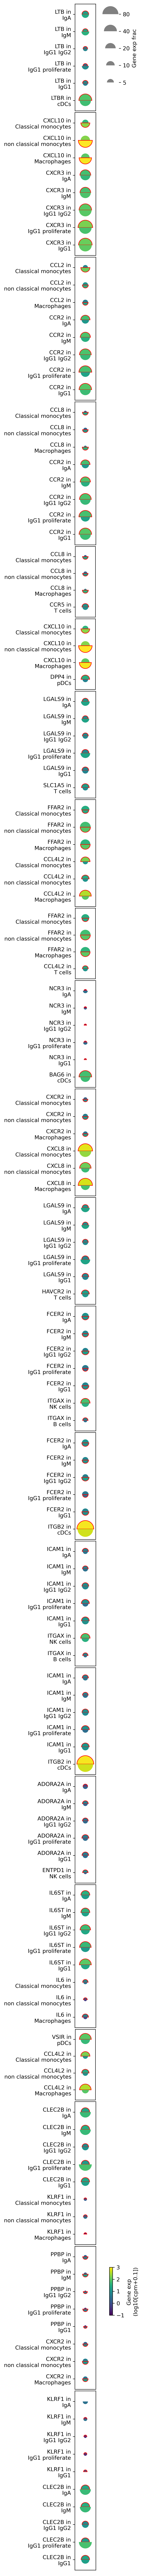

In [11]:
s_mushrooms(inter_genes)

In [169]:
def randomization_plot(fdn, ran_filter, ran_res):
    ran_genes = [{'ga': idx[0], 'cta': idx[1], 'gb': idx[2], 'ctb': idx[3]} for idx in ran_filter.index]
    for inter in ran_genes:
        fig, ax = plt.subplots(figsize=[3, 3], dpi=300)
        ga = inter['ga']
        cta = inter['cta']
        gb = inter['gb']
        ctb = inter['ctb']

        log2fc = ran_res.loc[ga, cta, gb, ctb]

        x0 = log2fc['log2fc_ga'].tolist()[0]
        y0 = log2fc['log2fc_gb'].tolist()[0]    

        x = log2fc['log2fc_ga'].tolist()[1:]
        y = log2fc['log2fc_gb'].tolist()[1:]

        ax.scatter(x0, y0, c='r', s=10)
        ax.scatter(x, y, c='blue', s=2)
        ax.axvline(0, c='gray', zorder=-3, lw=0.5)
        ax.axhline(0, c='gray', zorder=-3, lw=0.5)
        ax.set_ylim(-4, 4)
        ax.set_xlim(-4, 4)
        ax.set_xlabel('Log2fc of ' + ga + ' in ' + cta.replace('_', ' '))
        ax.set_ylabel('Log2fc of ' + gb + ' in ' + ctb.replace('_', ' '))
        p = ran_res.loc[ga, cta, gb, ctb]['pvalue'][0]
        if p == 0:
            ax.set_title('p value < 0.001')
        else:
            ax.set_title('p value: ' + str(p))
        plt.savefig(fdn + ga + '_in_' + cta + '&' + gb + '_in_' + ctb + '.png', bbox_inches = 'tight')
#######################################################################

In [19]:
def randomization(genes):
    log2fc = defaultdict(list)
    r = defaultdict(list)
    pvalue = {}
    
    for i, inter in enumerate(genes):
        if i % 100 == 0:
            print(i)
        ga = inter['ga']
        cta = inter['cta']
        gb = inter['gb']
        ctb = inter['ctb']
        
        adata_g = {}
        adata_children = adata[adata.obs['dataset'] == 'child']
        
        for gene, ct in zip([ga, gb], [cta, ctb]):
            if ct in adata_children.obs['cell_subtype_2'].unique():
                ct_type = 'cell_subtype_2'
            elif ct in adata_children.obs['cell_type'].unique():
                ct_type = 'cell_type'
            adata_ct = adata_children[adata_children.obs[ct_type] == ct]
            IDs = list(adata_ct.obs['ID'].astype('category').cat.categories)
            for ID in IDs:
                adata_ID = adata_ct[adata_ct.obs['ID'] == ID]
                if len(adata_ID.obs_names) < 5:
                    IDs.remove(ID)
            adata_ct = adata_ct[adata_ct.obs['ID'].isin(IDs)]
            adata_g[gene] = adata_ct[:, gene]  
            
        avg = {(gene, cd): adata_g[gene][adata_g[gene].obs['Condition'] == cd].X.toarray().mean() for gene in [ga, gb] for cd in ['S_dengue', 'dengue']}
        lfc = {gene: np.log2(avg[gene, 'S_dengue'] + 0.1) - np.log2(avg[gene, 'dengue'] + 0.1) for gene in [ga, gb]}
        log2fc[(ga, cta, gb, ctb)].append([lfc[ga], lfc[gb]])
        r0 = (float(lfc[ga])**2 + float(lfc[gb])**2)**0.5
        r[(ga, cta, gb, ctb)].append(r0)
        
        p = 0
        for i in range(1000):
            adata_i = adata_g
            raw = {gene: adata_i[gene].obs['Condition'].tolist() for gene in [ga, gb]}
            for gene in [ga, gb]:
                random.shuffle(raw[gene])
                adata_i[gene].obs['Condition'] = raw[gene]
            avg_i = {(gene, cd): adata_i[gene][adata_i[gene].obs['Condition'] == cd].X.toarray().mean() for gene in [ga, gb] for cd in ['S_dengue', 'dengue']}
            log2fc_i = {gene: np.log2(avg_i[gene, 'S_dengue'] + 0.1) - np.log2(avg_i[gene, 'dengue'] + 0.1) for gene in [ga, gb]}
            log2fc[(ga, cta, gb, ctb)].append([log2fc_i[ga], log2fc_i[gb]])
            ri = (float(log2fc_i[ga])**2 + float(log2fc_i[gb])**2)**0.5
            r[(ga, cta, gb, ctb)].append(ri)
            if ri >= r0:
                p += 1
        pvalue[(ga, cta, gb, ctb)] = p * 0.001

    res = pd.DataFrame([])
    for key in log2fc.keys():
        log2fc[key] = pd.DataFrame(log2fc[key], columns = ['log2fc_ga', 'log2fc_gb'])
        log2fc[key]['r'] = r[key]
        log2fc[key]['pvalue'] = pvalue[key]
        for j, s in enumerate(['ga', 'csta', 'gb', 'cstb']):
            log2fc[key][s] = key[j]
        res = pd.concat([res, log2fc[key]])
    res = res.set_index(['ga', 'csta', 'gb', 'cstb'])
        
    return res

In [25]:
ran_genes = []
for inter in inter_genes:
    ga = list(inter.keys())[0]
    ga_cts = inter[ga]
    gb = list(inter.keys())[1]
    gb_cts = inter[gb]
    
    for ga_ct in ga_cts:
        for gb_ct in gb_cts:
            ran_genes.append({'ga': ga, 'cta': ga_ct, 'gb': gb, 'ctb': gb_ct})

ran_res = randomization(ran_genes)

0


Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attrib

Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attrib

100


Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attrib

Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attrib

In [26]:
ran_res

log2fc_ga  log2fc_gb         r  pvalue
ga     csta gb    cstb                                        
LTBR   cDCs LTB   IgG1   0.447520   0.728845  0.855272   0.297
                  IgG1  -0.365297  -0.498810  0.618266   0.297
                  IgG1  -0.098124  -0.516695  0.525930   0.297
                  IgG1   0.397535  -0.174816  0.434275   0.297
                  IgG1  -0.766859  -0.151881  0.781755   0.297
...                           ...        ...       ...     ...
CLEC2B IgA  KLRF1 IgA    0.253260   5.010369  5.016766   0.001
                  IgA    0.320719   1.290150  1.329416   0.001
                  IgA    0.344381   0.988349  1.046628   0.001
                  IgA    0.109268   0.459056  0.471882   0.001
                  IgA   -0.025014   2.229418  2.229558   0.001

[200200 rows x 4 columns]

In [28]:
ran_res.to_csv('/home/yike/phd/dengue/data/tables/cell_subtype/randomization_inters_Mo&Pl_csts_from_cts.tsv', sep='\t')

In [36]:
filter_genes = []
for i, inter in enumerate(ran_genes):
        ga = inter['ga']
        csta = inter['cta']
        gb = inter['gb']
        cstb = inter['ctb']
        if ran_res.loc[ga, csta, gb, cstb][:1]['pvalue'][0] == 0:
            filter_genes.append({ga: [csta], gb: [cstb]})
            

<ipython-input-36-0a07afe447ce>:7: PerformanceWarning: indexing past lexsort depth may impact performance.
  if ran_res.loc[ga, csta, gb, cstb][:1]['pvalue'][0] == 0:


In [39]:
inters = []
f_genes = []
for i, inter in enumerate(filter_genes):
    it = list(inter.keys())
    if it not in inters:
        inters.append(it)
        f_genes.append(inter)
    else:
        for j, itj in enumerate(inters):
            if it == itj:
                if inter[it[0]][0] not in f_genes[j][it[0]]:
                    f_genes[j][it[0]].append(inter[it[0]][0])
                if inter[it[1]][0] not in f_genes[j][it[1]]:
                    f_genes[j][it[1]].append(inter[it[1]][0])     

In [40]:
f_genes

[{'CXCR3': ['IgG1', 'IgG1_proliferate', 'IgG1_IgG2', 'IgM', 'IgA'],
  'CXCL10': ['Macrophages', 'non_classical_monocytes', 'Classical_monocytes']},
 {'CCR2': ['IgG1', 'IgG1_proliferate', 'IgG1_IgG2', 'IgM', 'IgA'],
  'CCL2': ['Classical_monocytes']},
 {'CCR2': ['IgG1', 'IgG1_proliferate', 'IgG1_IgG2', 'IgM', 'IgA'],
  'CCL8': ['Classical_monocytes']},
 {'CCR5': ['T_cells'], 'CCL8': ['Classical_monocytes']},
 {'DPP4': ['pDCs'],
  'CXCL10': ['Macrophages', 'non_classical_monocytes', 'Classical_monocytes']},
 {'CCL4L2': ['Classical_monocytes', 'T_cells'],
  'FFAR2': ['Macrophages', 'non_classical_monocytes', 'Classical_monocytes']},
 {'ITGAX': ['B_cells', 'NK_cells'], 'FCER2': ['IgG1_IgG2']},
 {'ITGB2': ['cDCs'], 'FCER2': ['IgG1_IgG2']},
 {'ITGAX': ['B_cells', 'NK_cells'], 'ICAM1': ['IgG1_proliferate']},
 {'ITGB2': ['cDCs'], 'ICAM1': ['IgG1_proliferate']},
 {'ENTPD1': ['NK_cells'],
  'ADORA2A': ['IgG1', 'IgG1_proliferate', 'IgG1_IgG2', 'IgM']},
 {'IL6': ['Classical_monocytes'], 'IL6ST': [

<ipython-input-10-698399067179>:133: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


{'fig': <Figure size 468x10080 with 16 Axes>,
 'ax': [<AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>]}

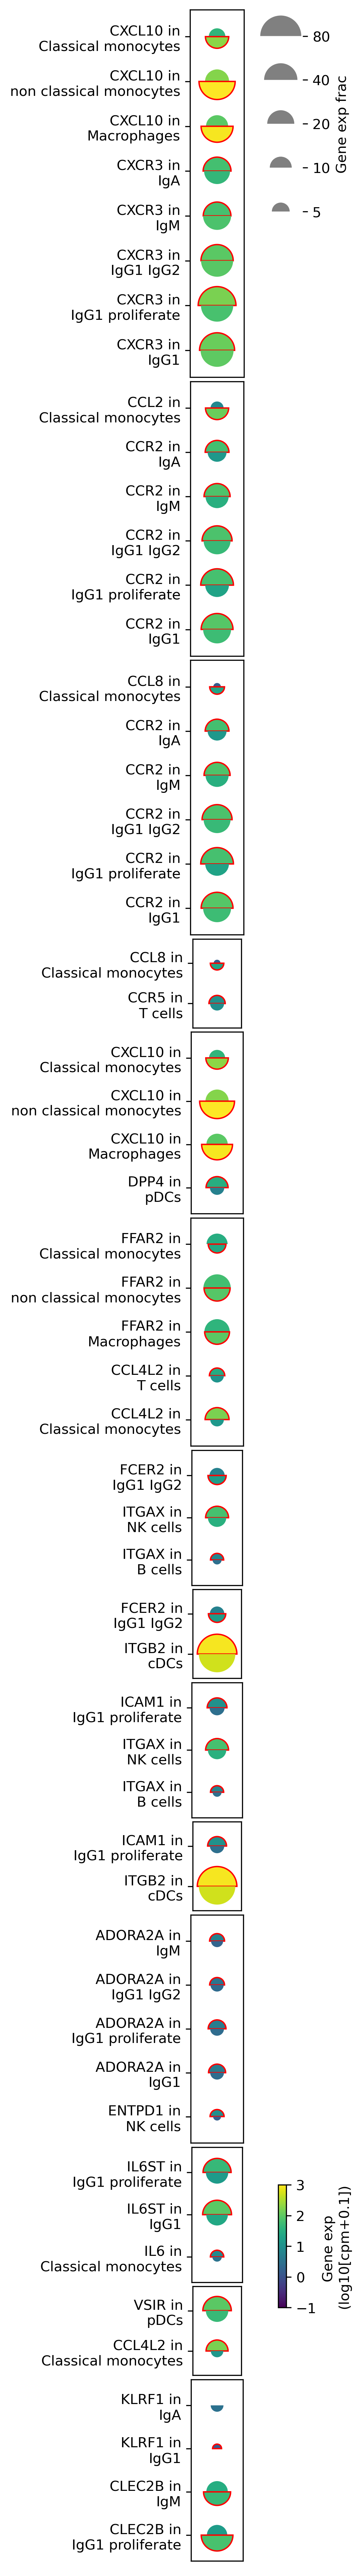

In [41]:
s_mushrooms(f_genes)

<ipython-input-169-61d6c2315d76>:10: PerformanceWarning: indexing past lexsort depth may impact performance.
  log2fc = ran_res.loc[ga, cta, gb, ctb]
<ipython-input-169-61d6c2315d76>:26: PerformanceWarning: indexing past lexsort depth may impact performance.
  p = ran_res.loc[ga, cta, gb, ctb]['pvalue'][0]
<ipython-input-169-61d6c2315d76>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=[3, 3], dpi=300)


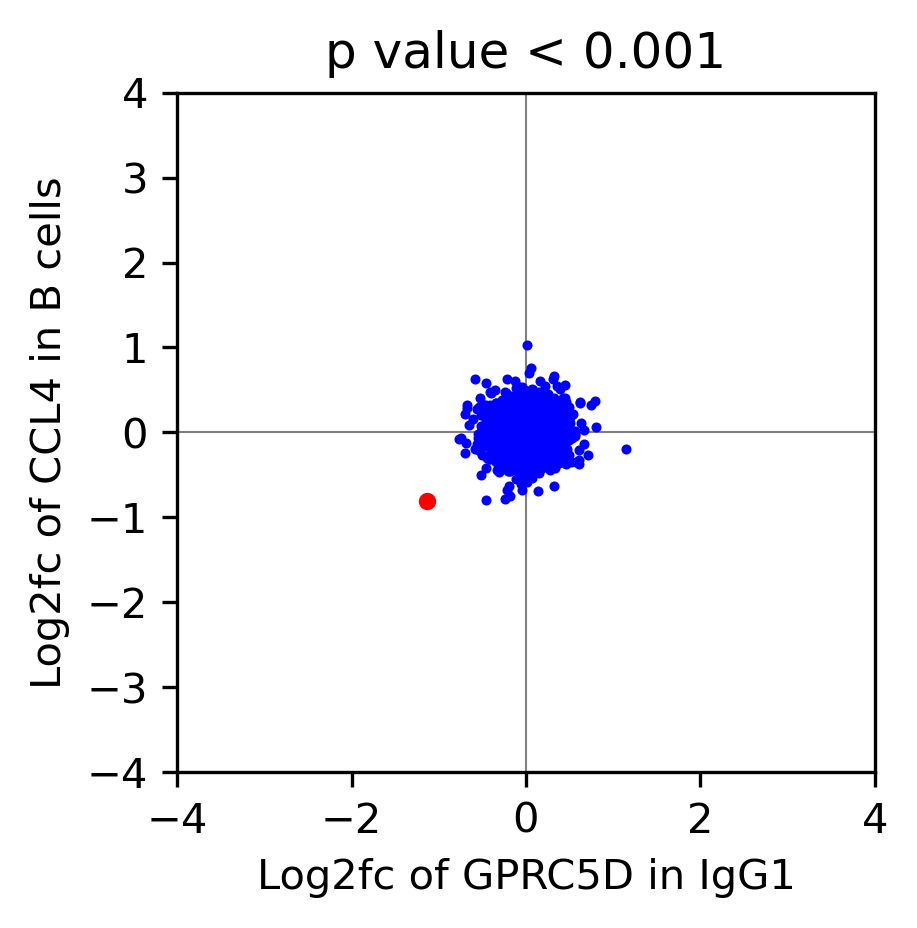

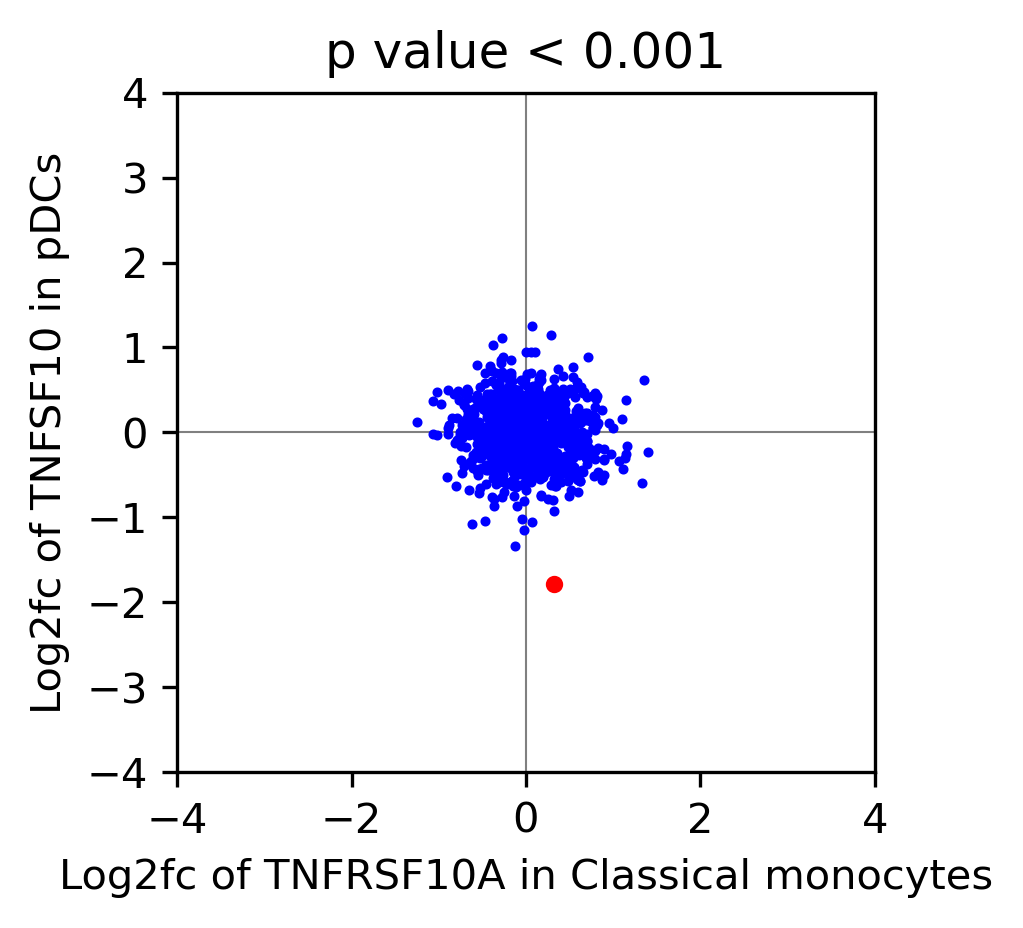

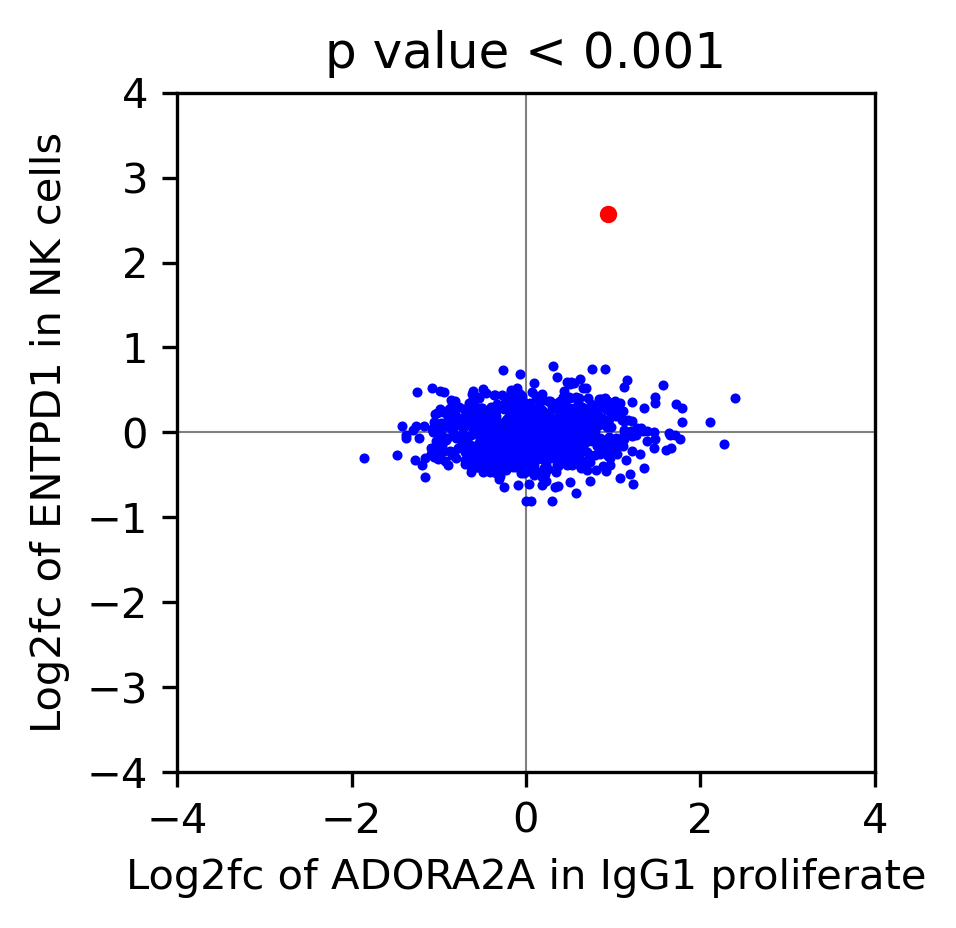

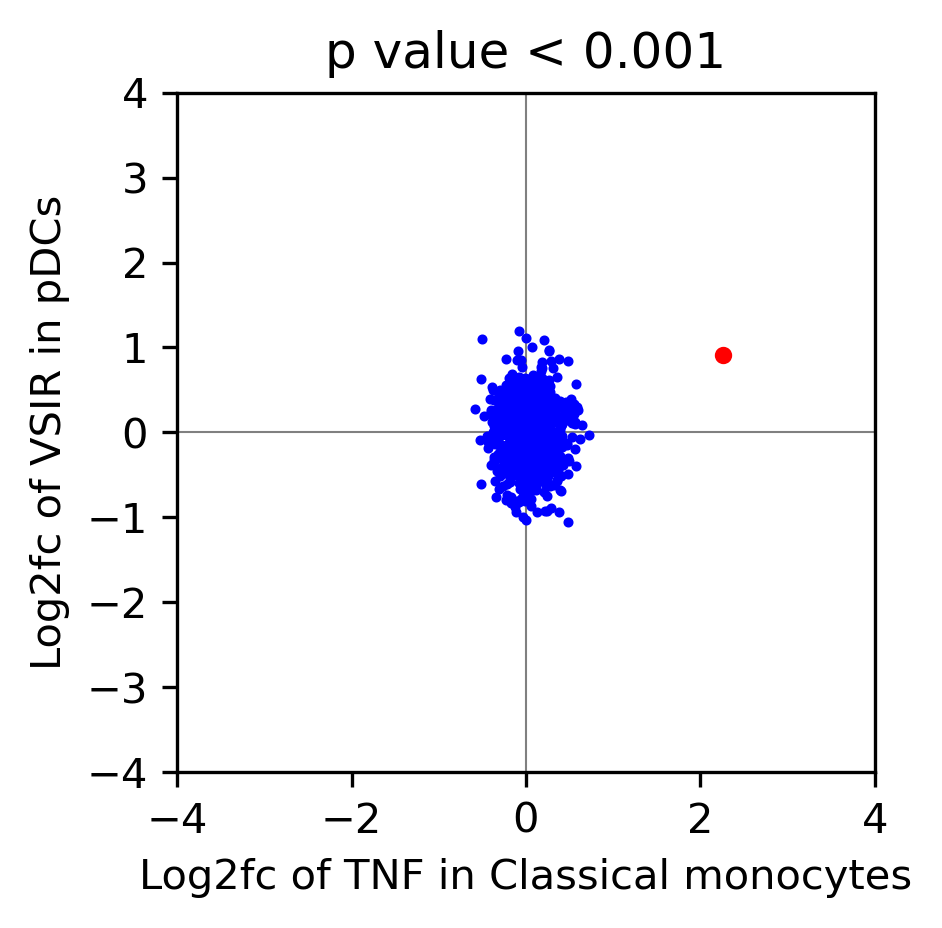

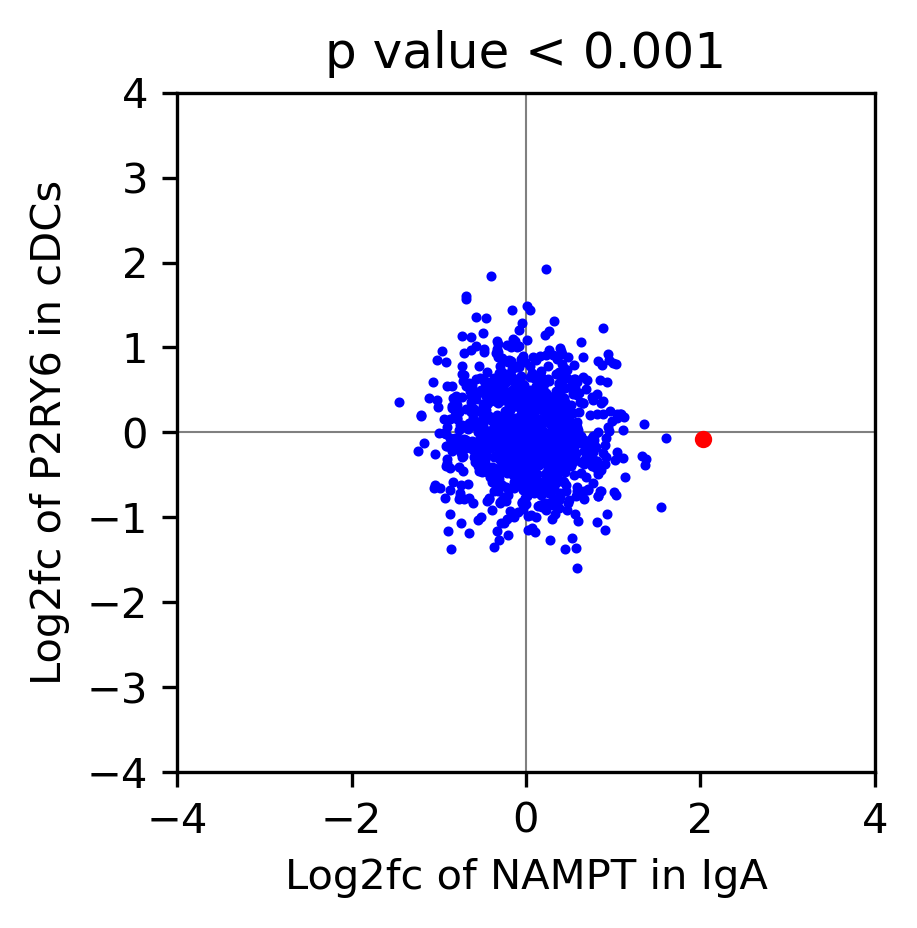

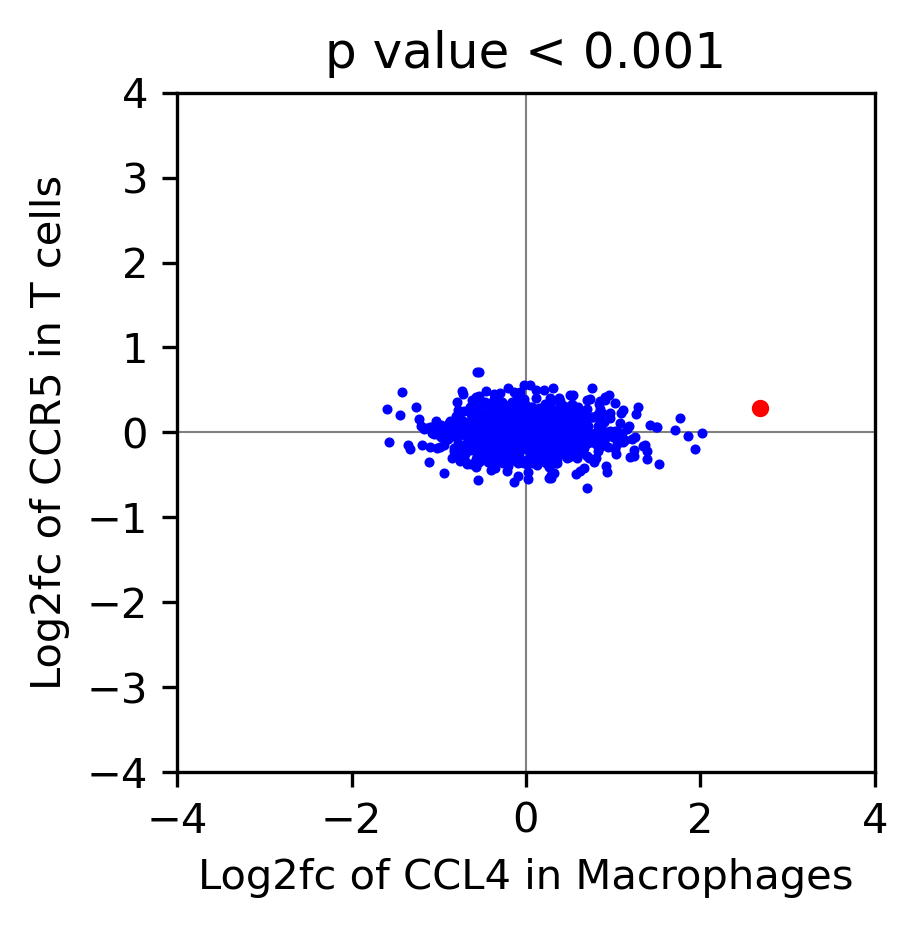

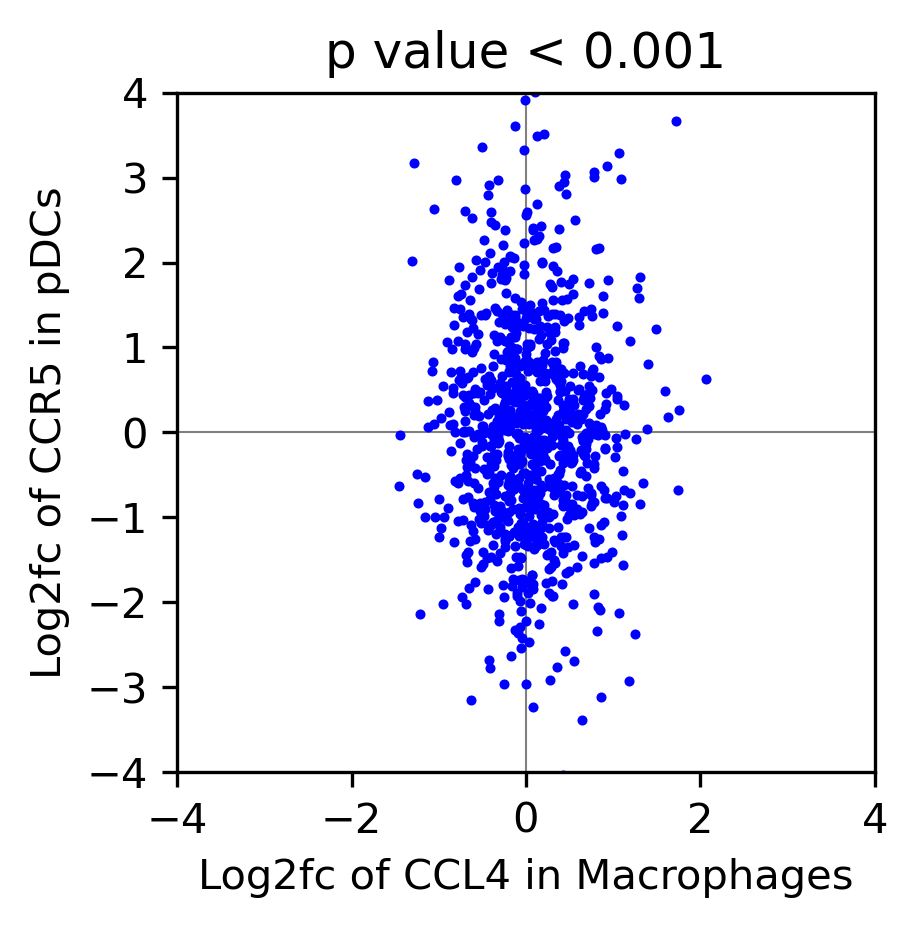

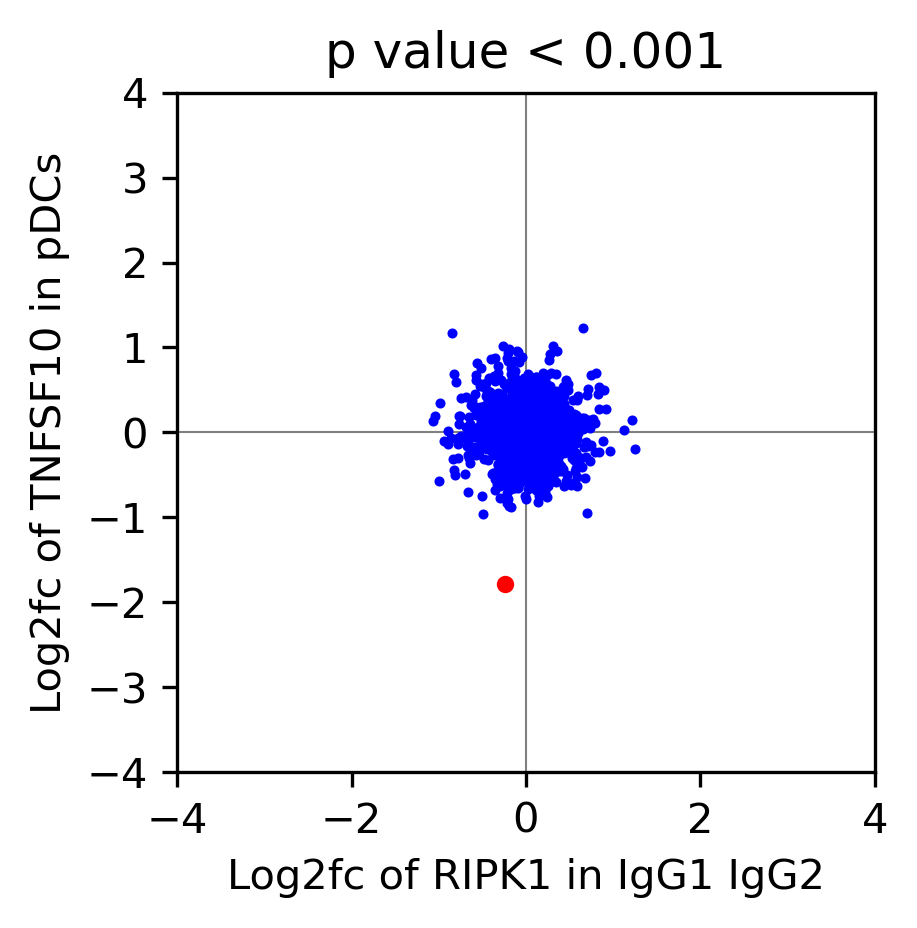

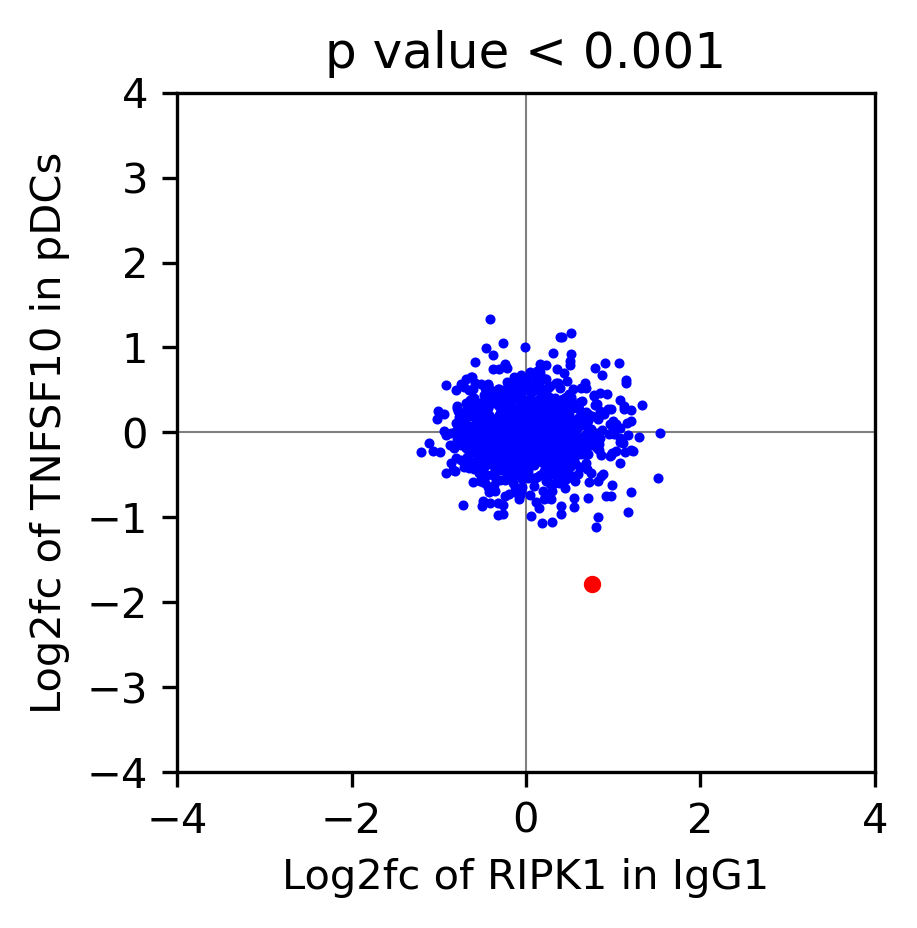

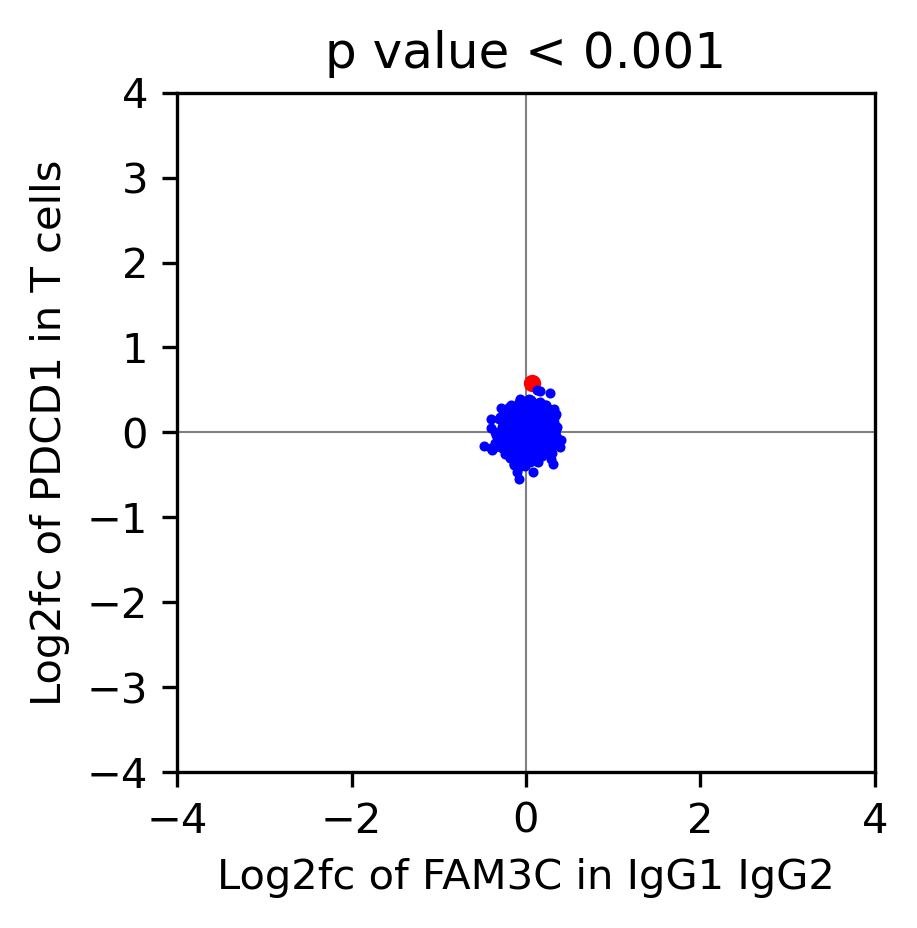

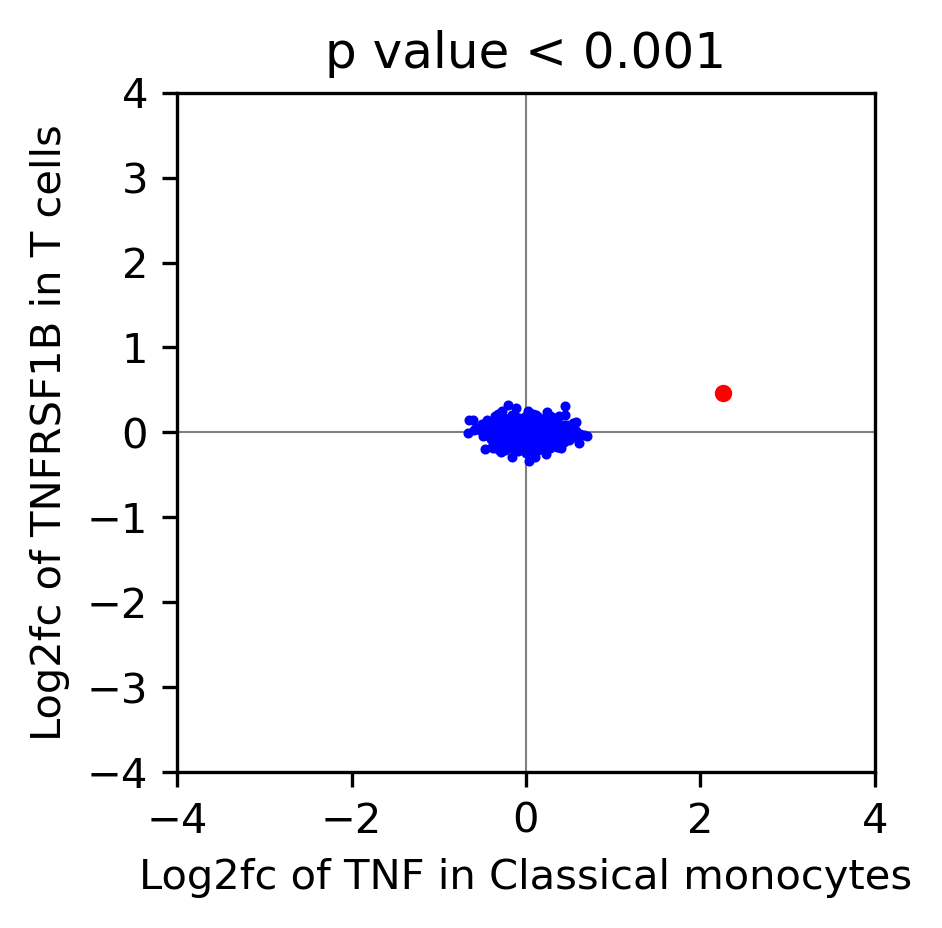

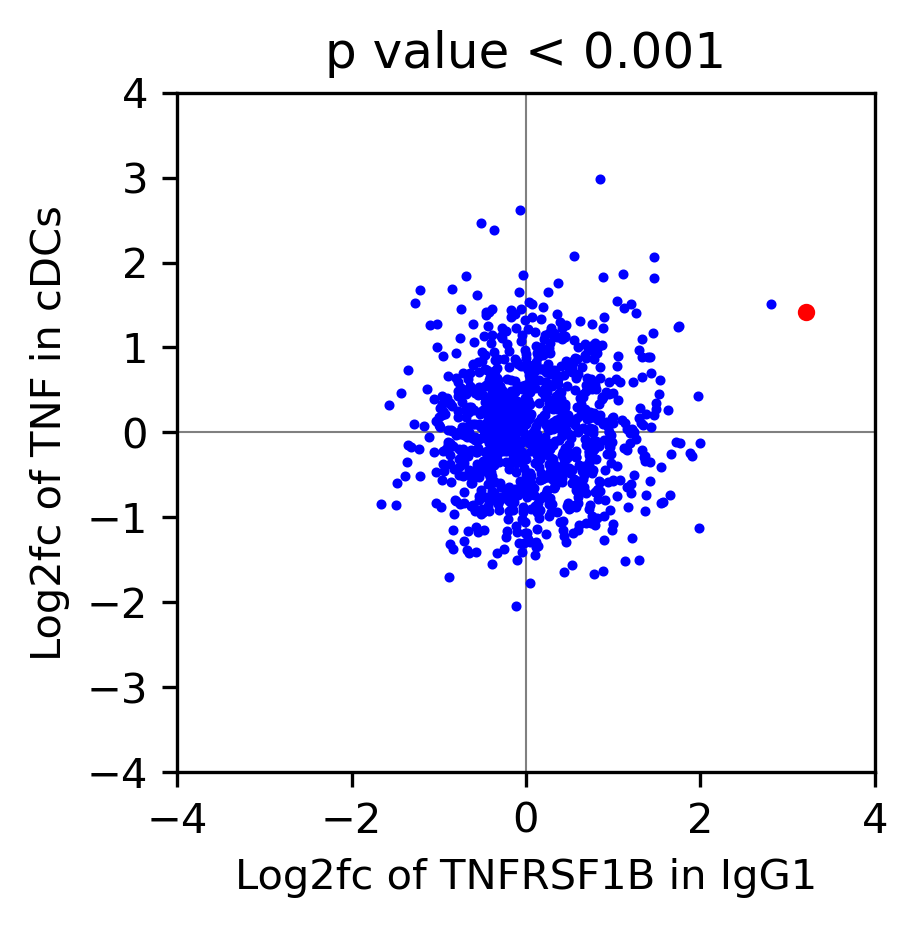

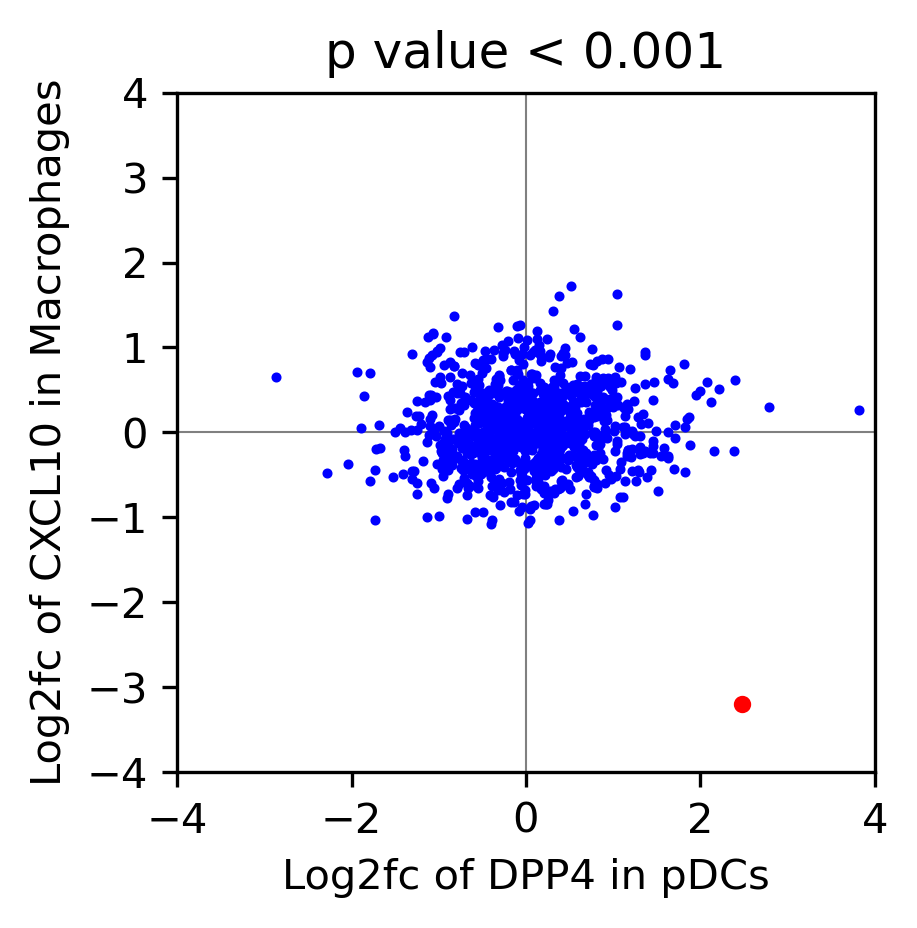

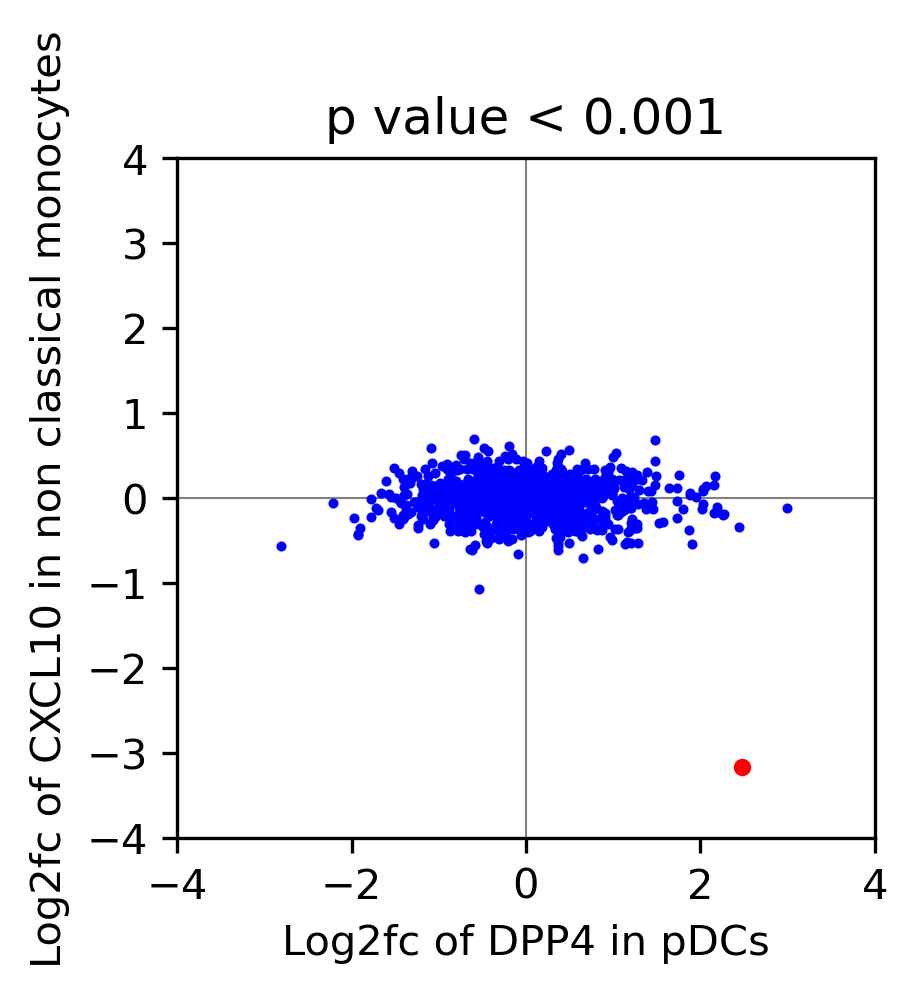

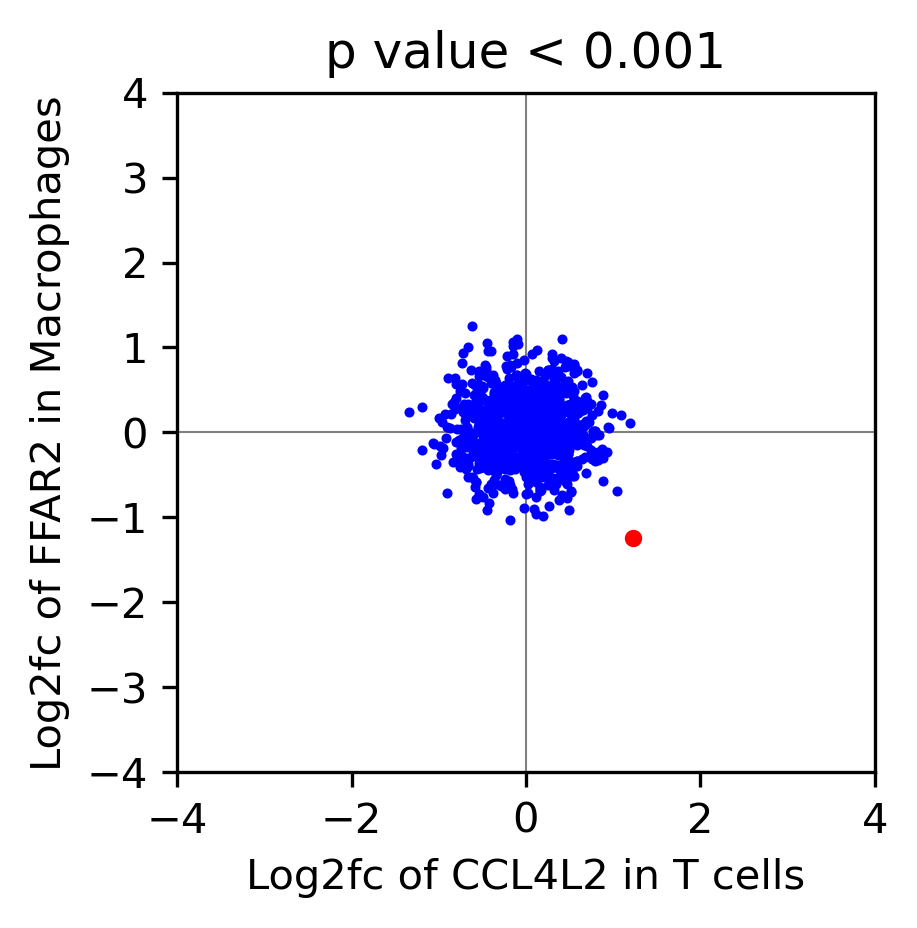

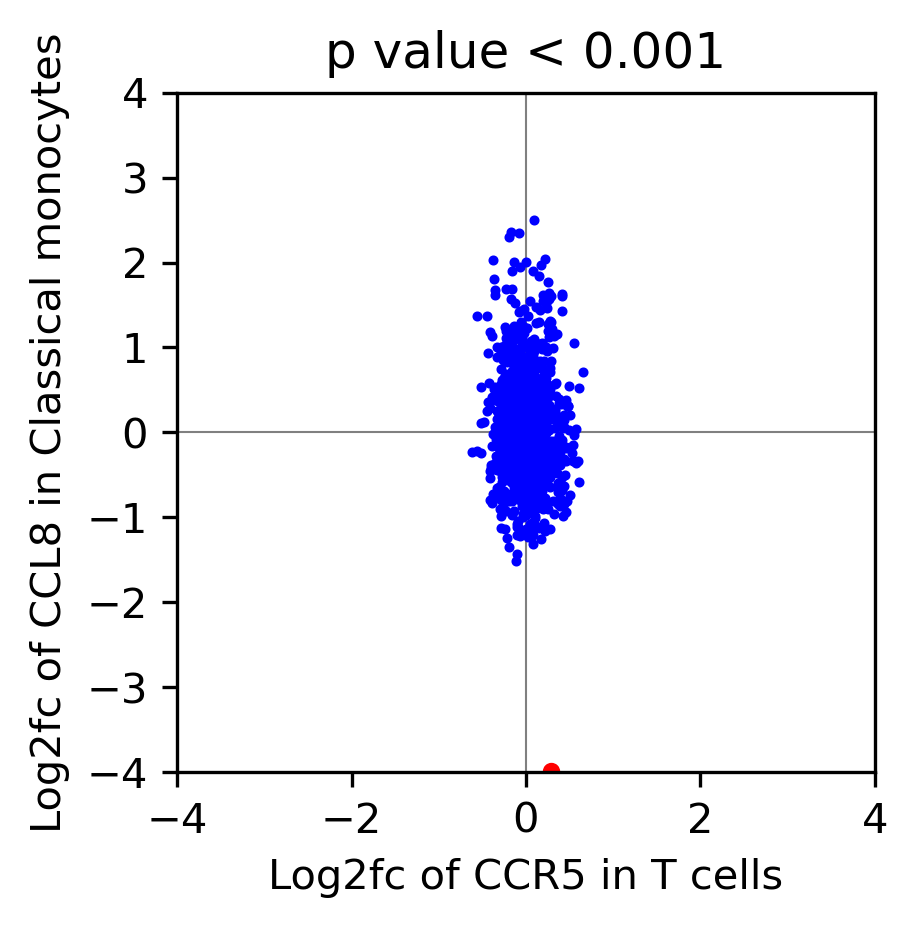

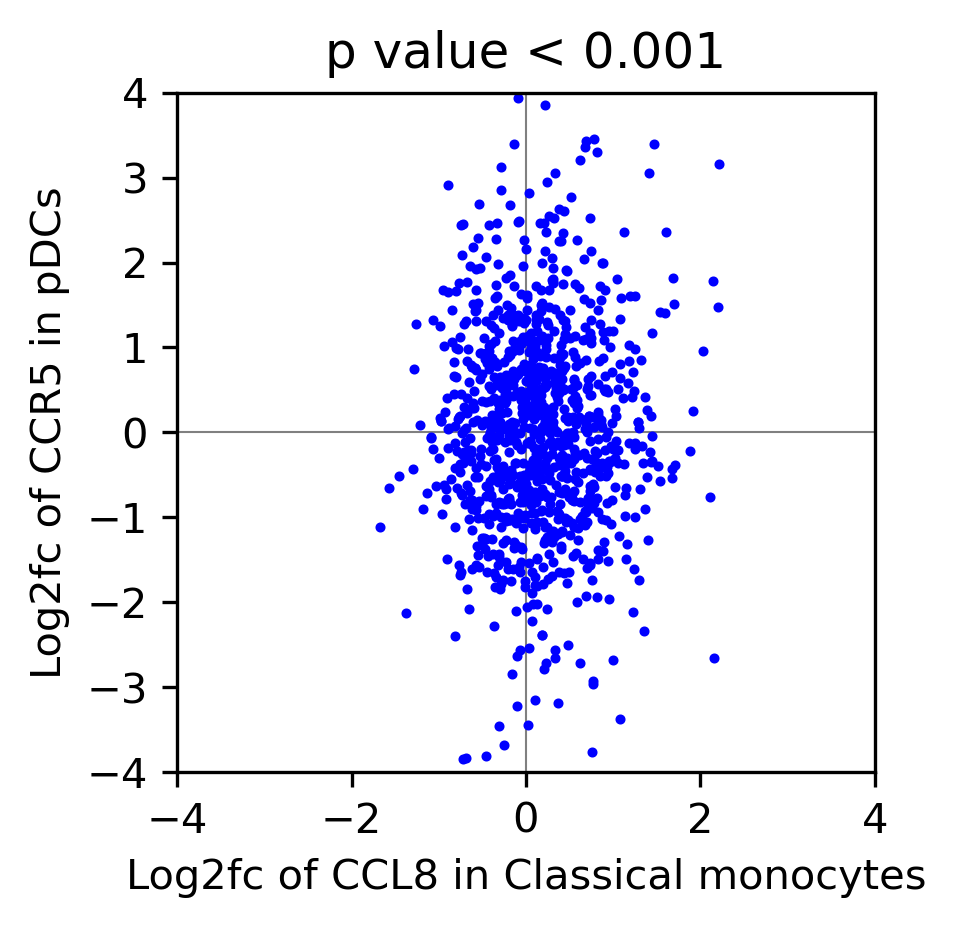

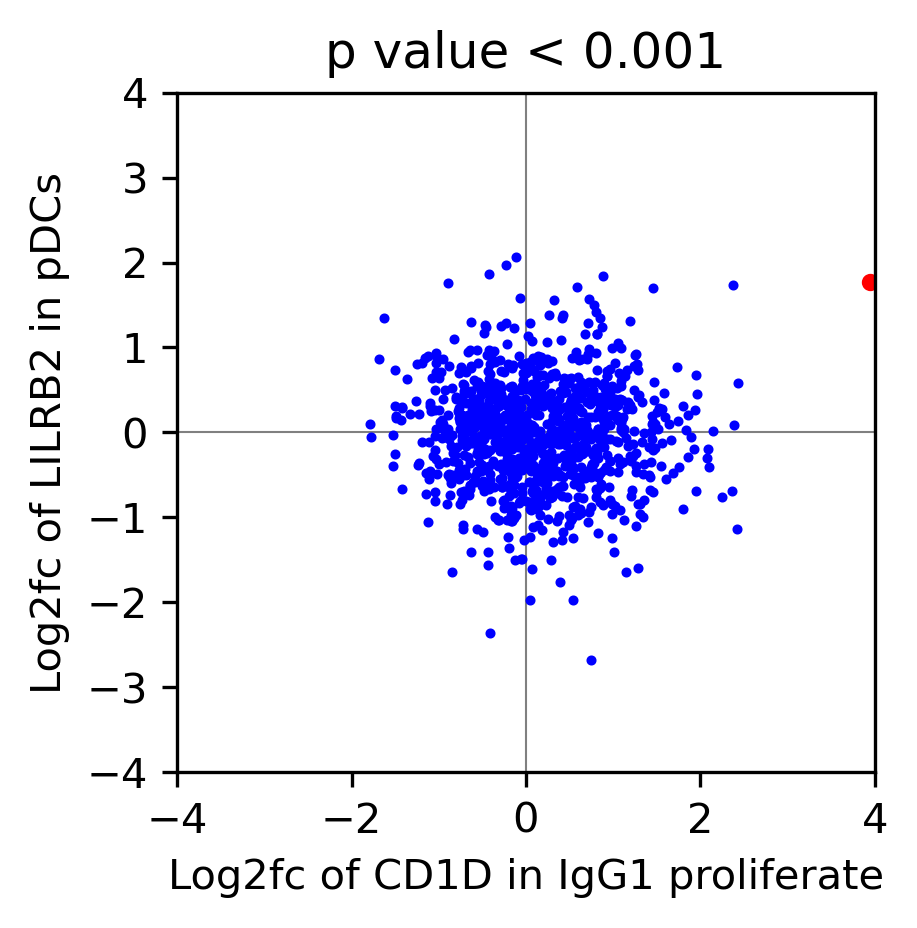

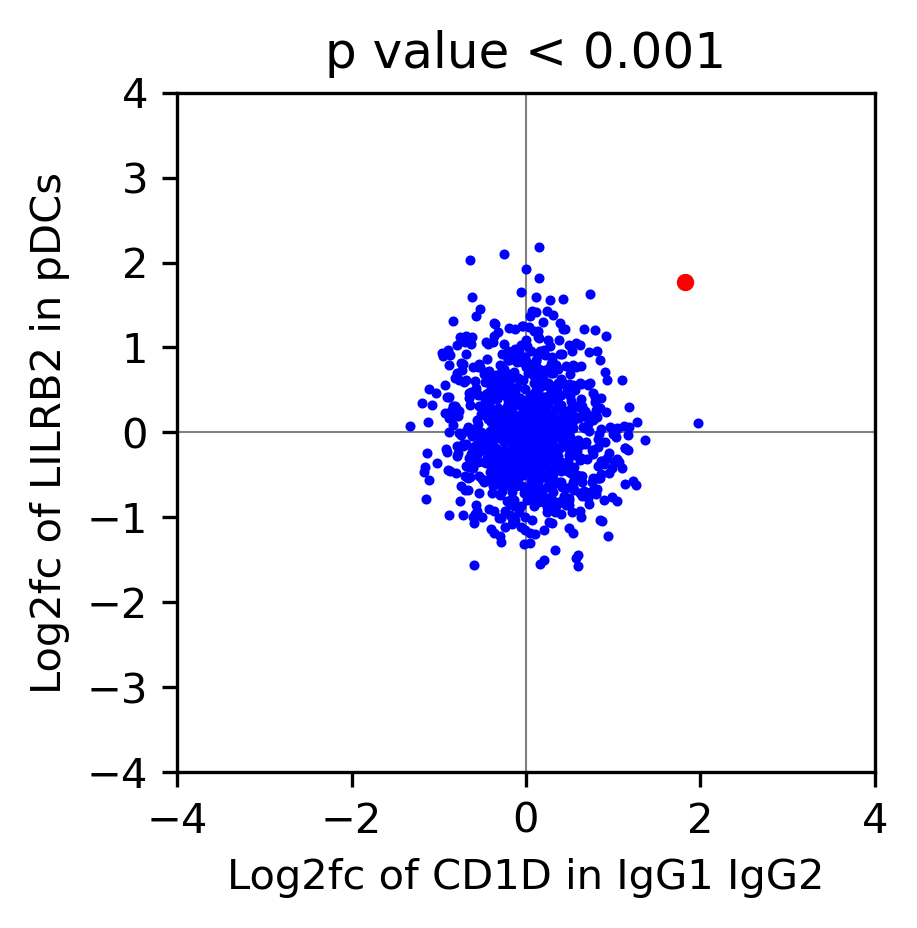

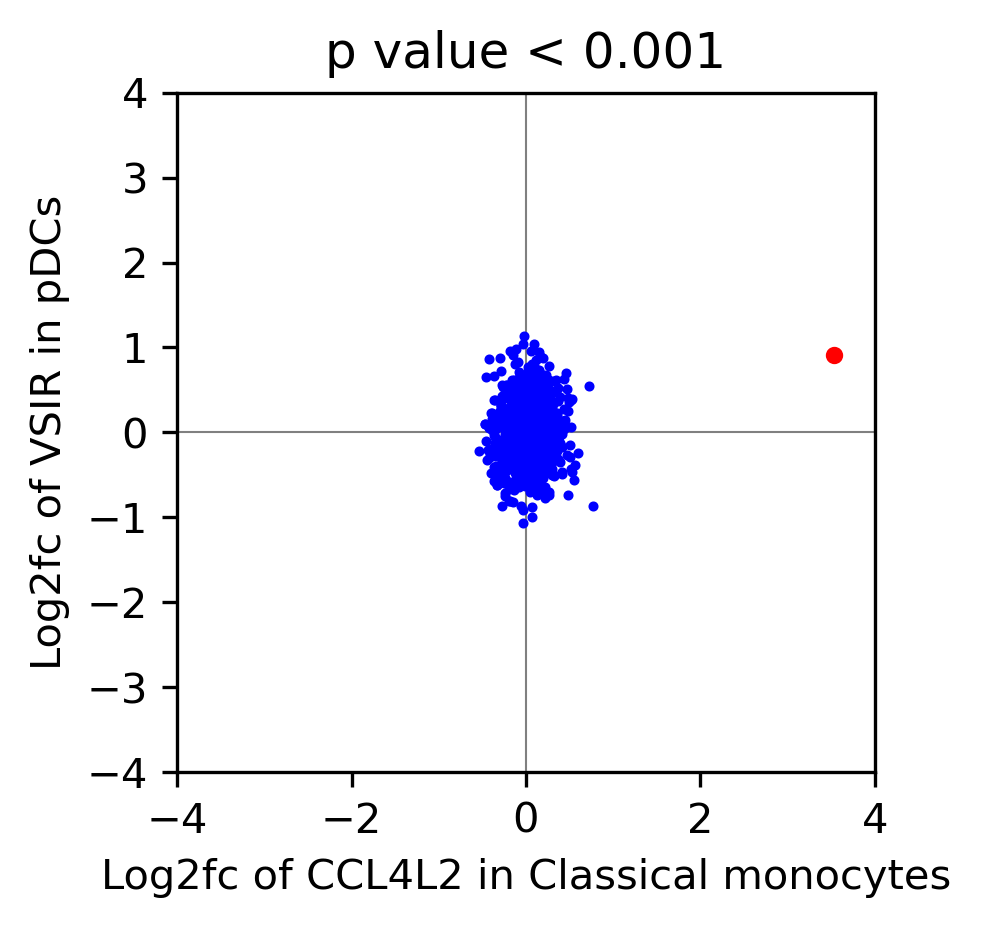

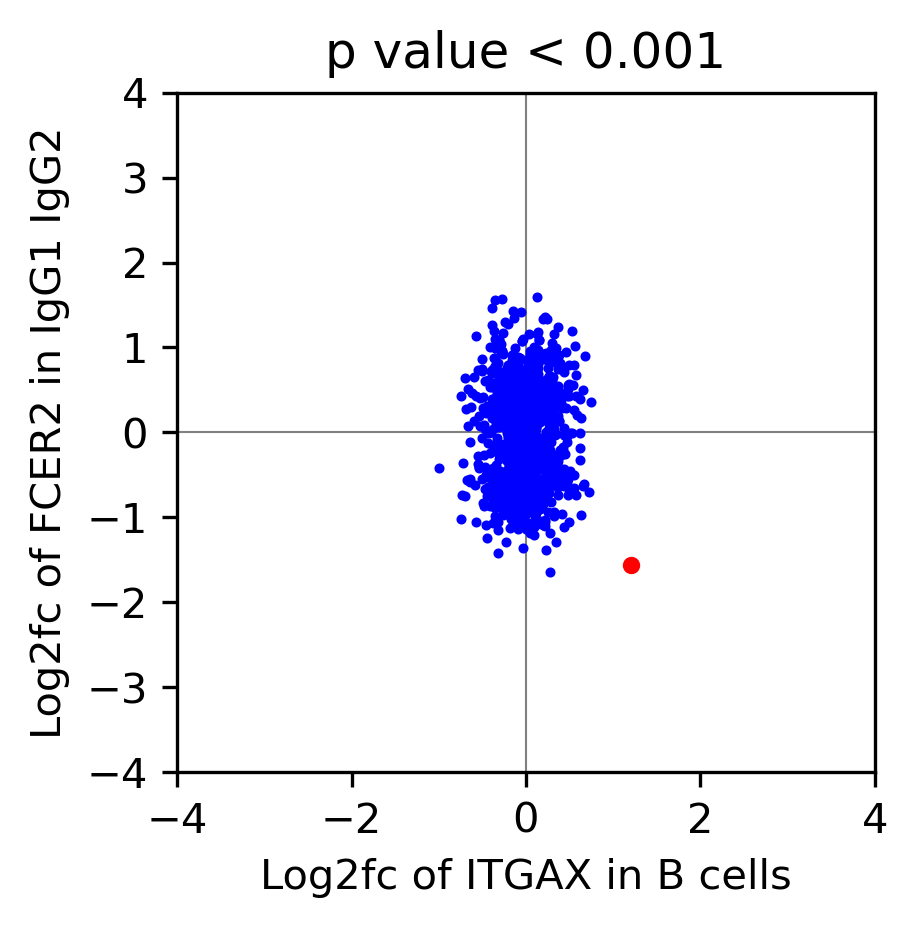

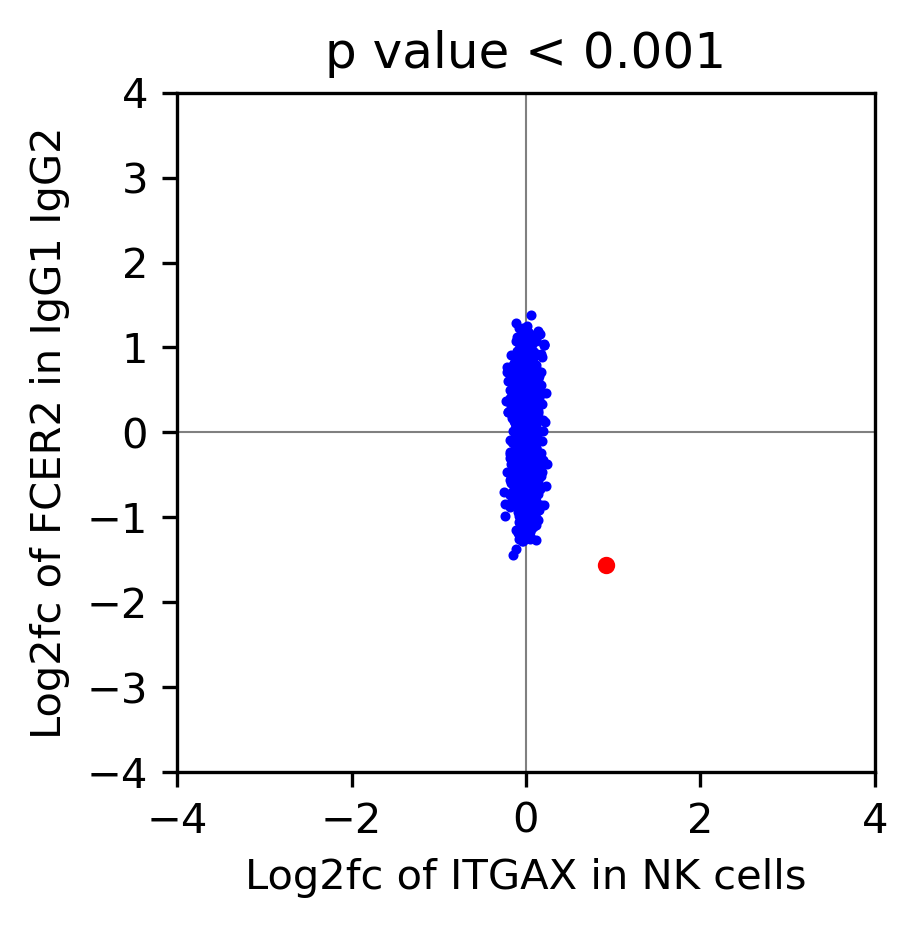

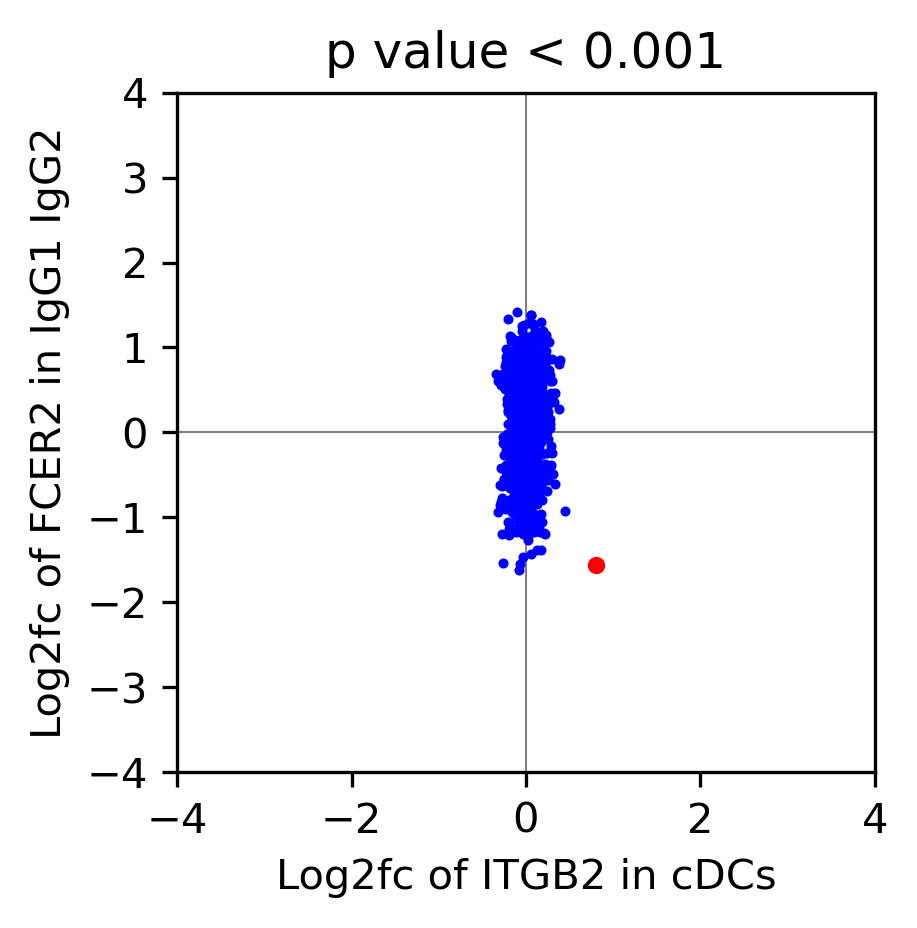

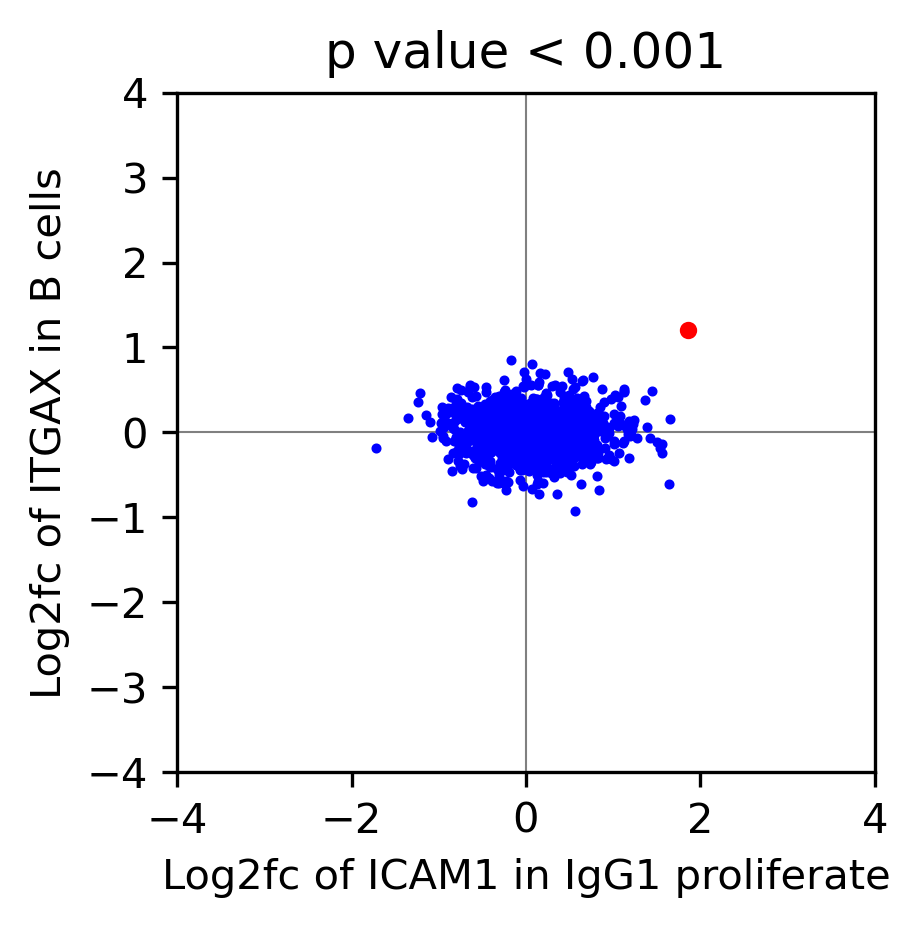

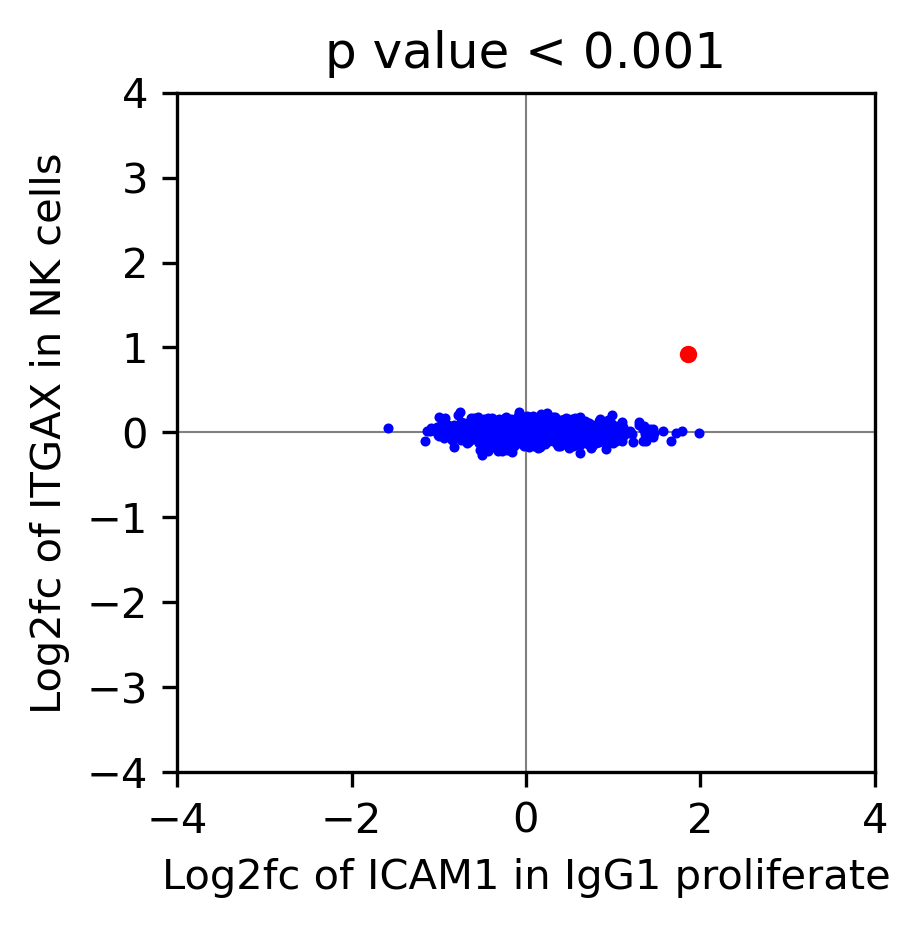

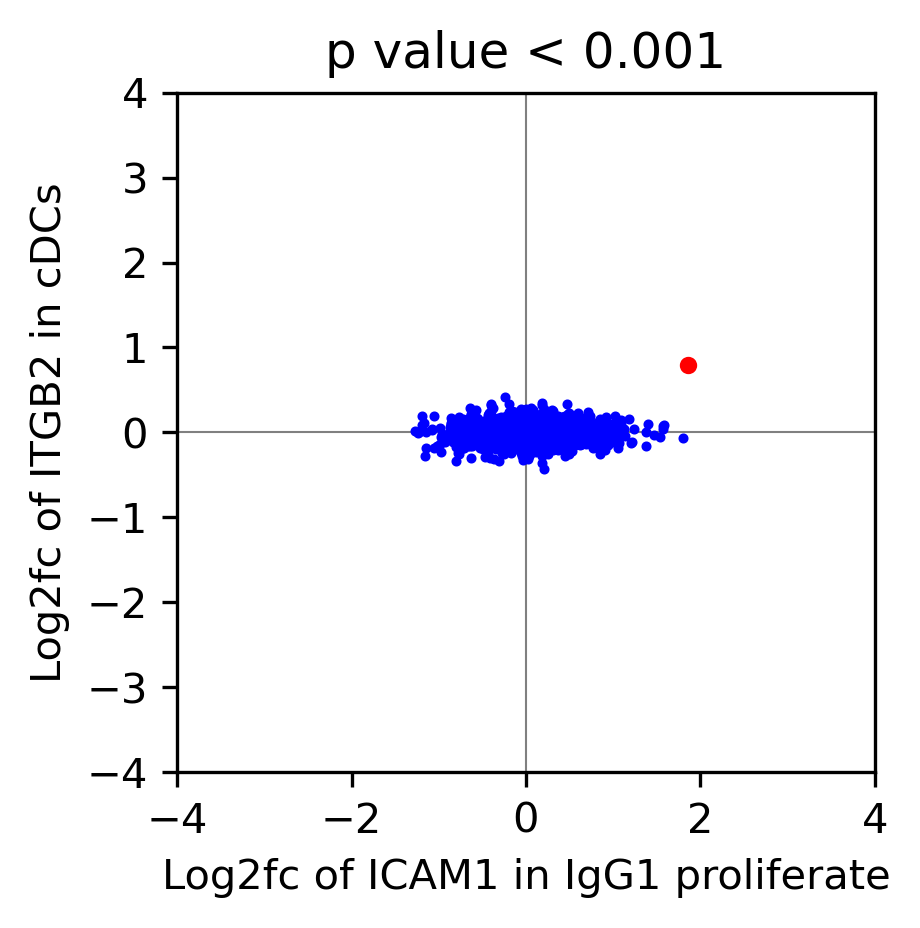

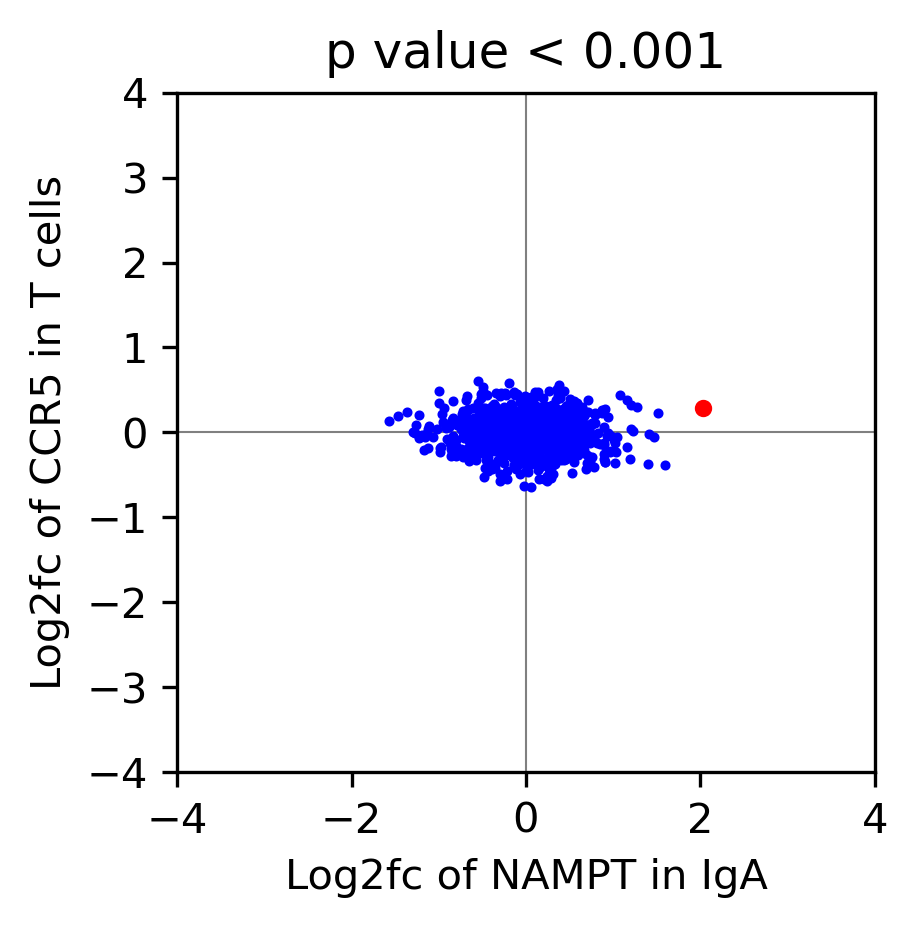

In [170]:
fdn = '/home/yike/phd/dengue/figures/cell_subtype/ran_csts_from_cts'
randomization_plot(fdn, ran_filter, ran_res)